# Analyzing Ride-Sharing Trends for Zuber in Chicago

## Introduction:
As an analyst for Zuber, a new ride-sharing company in Chicago, my goal is to uncover key patterns in the available data. By analyzing passenger preferences and external factors affecting rides, I can provide insights to help Zuber optimize its operations and stay competitive.

This project involves working with a database that includes ride data from competitors, taxi company details, neighborhood information, and weather conditions. I’ll explore trends in ride frequency, identify factors influencing passenger demand, and test a hypothesis on how weather impacts ride volume.

By the end of this analysis, I’ll have a data-driven understanding of Chicago’s ride-sharing market, helping Zuber make informed business decisions as they launch.

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
name_df = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project6/moved_project_sql_result_01.csv')
location_df = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project6/moved_project_sql_result_04.csv')

In [19]:
name_df

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [20]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [21]:
name_df.duplicated().sum()

0

In [22]:
location_df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [23]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [24]:
location_df.duplicated().sum()

0

# Identified top 10 neighborhoods in terms of drop offs

In [25]:
top_10_neighborhood = location_df.sort_values(by='average_trips', ascending=False).reset_index(drop=True).head(10)
top_10_neighborhood

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


# Taxi Company by Number of Rides


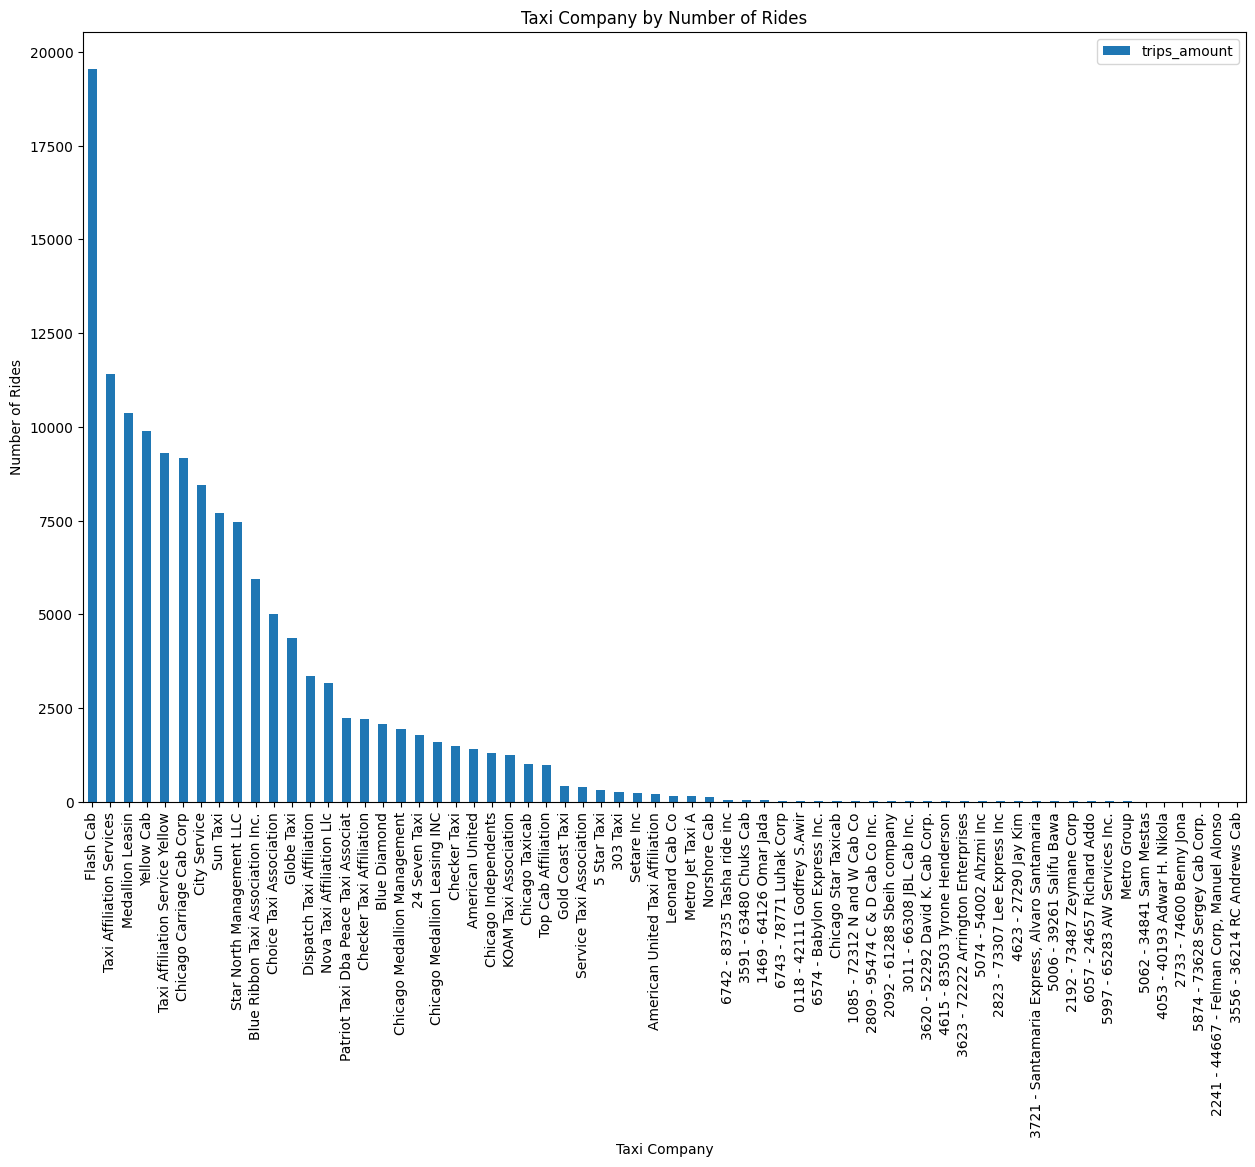

In [26]:
name_df.plot(title='Taxi Company by Number of Rides',
             x='company_name',
             y='trips_amount',
             kind='bar',
             figsize=(15,10),
             xlabel='Taxi Company',
             ylabel='Number of Rides')
plt.show()

In [27]:
total = name_df[name_df['company_name'] != 'Flash Cab']['trips_amount'].sum()

In [32]:
flash_cab = name_df[name_df['company_name'] == 'Flash Cab']['trips_amount'].sum()

In [33]:
flash_cab / total

0.16609343286370623

In [34]:
# Out of 64 cab companies, Flash Cab was responsible for 16% of the rides.
name_df['company_name'].nunique()

64

# Top 10 Neighborhoods by Number of Dropoffs

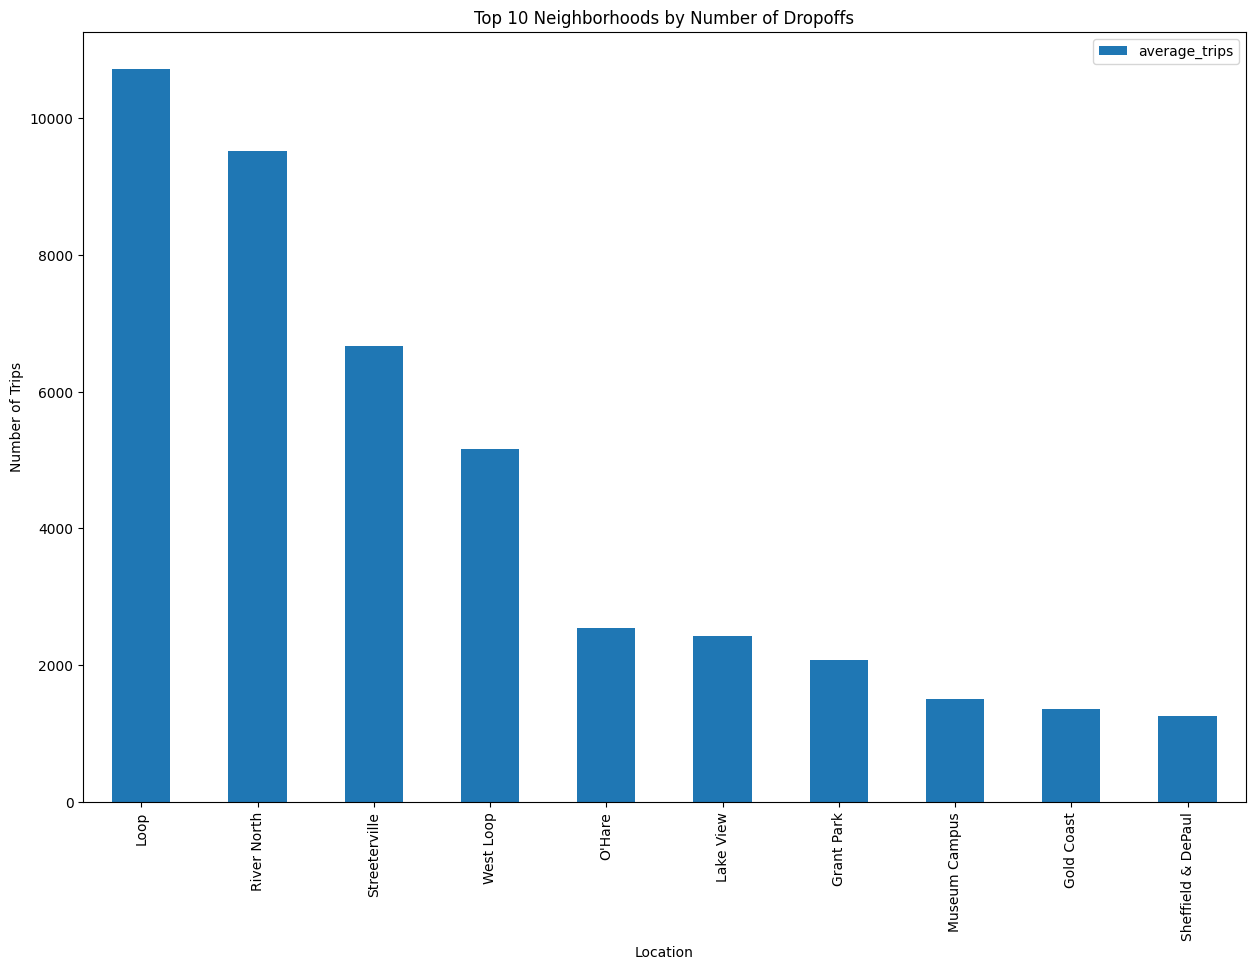

In [35]:
top_10_neighborhood.plot(title='Top 10 Neighborhoods by Number of Dropoffs',
             x='dropoff_location_name',
             y='average_trips',
             kind='bar',
             figsize=(15,10),
             xlabel='Location',
             ylabel='Number of Trips')
plt.show()


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Thoughts on Charts </h2>
   
Flash Cab is DOMINATING the market, with nearly doubling the amount of rides than the next competitor. The Loop seems to be a popular area for dropoff with over 10,000 trips, followed closely by River North with just under 10,000 trips.

Flash Cab has 16.6% of the total number of rides out of the 64 different companies listed.
    
</div>

In [37]:
weather_df = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project6/moved_project_sql_result_07.csv')

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Student's Comment </h2>
   
This dataframe contains data on rides from the Loop to O'Hare International Airport..
    
</div>

In [38]:
weather_df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [39]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [40]:
# Converted from object to datetime
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

In [41]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [42]:
# Created a new column for day of week
weather_df['day_of_week'] = weather_df['start_ts'].dt.day_name()

In [43]:
# Had to make sure the dataframe only contained Saturdays
weather_df['day_of_week'].unique() 

array(['Saturday'], dtype=object)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Hypothesis </h2>
   
Ho: The average duration of rides from the Loop to O'Hare International Airport is about same on rainy Saturdays as it is sunny Saturdays.

Ha: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

    
</div>

In [44]:
# Having a 0.05 alpha should be sufficient enough for this analysis
alpha = 0.05

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Good vs Bad Conditions </h2>
   
Separated good weather conditions from bad weather conditions in two separate dateframes.

    
</div>

In [45]:
good_conditions = weather_df[weather_df['weather_conditions'] == 'Good']
good_conditions

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday


In [46]:
bad_conditions = weather_df[weather_df['weather_conditions'] == 'Bad']
bad_conditions

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
30,2017-11-18 12:00:00,Bad,1980.0,Saturday
34,2017-11-04 17:00:00,Bad,2460.0,Saturday
51,2017-11-04 16:00:00,Bad,2760.0,Saturday
52,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday


In [47]:
avg_secs_good = good_conditions['duration_seconds']
avg_secs_good

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [48]:
avg_secs_bad = bad_conditions['duration_seconds']
avg_secs_bad

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Decision on Statistical Test </h2>
   
I decided to use a t-test since they are used in statistical analysis to determine if there is a significant difference between the means of two groups.

    
</div>

In [49]:
t_stat, p_value = stats.ttest_ind(avg_secs_good, avg_secs_bad, equal_var=False)

In [50]:
print(f"T-statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-statistic: -7.186034288068629
P-Value: 6.738994326108734e-12


In [51]:
if p_value < alpha:
    print("Reject the null hypothesis: Evidence found to conclude that average duration of rides from the Loop to O'Hare International Airport on sunny Saturdays and rainy Saturdays are significantly different.")
else:
    print("Fail to reject the null hypothesis: Data doesn't support the idea that the average durations are different. Average durations between sunny and rainy Saturdays could be similar")

Reject the null hypothesis: Evidence found to conclude that average duration of rides from the Loop to O'Hare International Airport on sunny Saturdays and rainy Saturdays are significantly different.


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Conclusion </h2>
   
Based on the results from the hypothesis, we can say that statistics show that ride durations between sunny and rainy days vary significantly.

    
</div>